In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import logging
logging.basicConfig(level=logging.INFO)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
from astropy.wcs import WCS
from astropy.io import fits

from gzjwst import chisq_utils

from scipy.stats import truncnorm, norm
# from scipy.optimize import minimize

In [31]:
fits_locs = []

filter_bands = ['f115w', 'f150w', 'f200w','f277w', 'f356w', 'f444w']
# filter_bands = filter_bands[2:3]

for filter_band in filter_bands:
    fits_loc_for_filter = glob.glob('/home/walml/repos/gz-jwst/data/dev_data/hlsp_ceers_*_nircam6*{}*i2d.fits.gz'.format(filter_band))
    assert len(fits_loc_for_filter) == 1, filter_band
    fits_locs += fits_loc_for_filter


In [19]:
fits_locs[2]

'/home/walml/repos/gz-jwst/data/dev_data/hlsp_ceers_jwst_nircam_nircam6_f200w_v0.5_i2d.fits.gz'

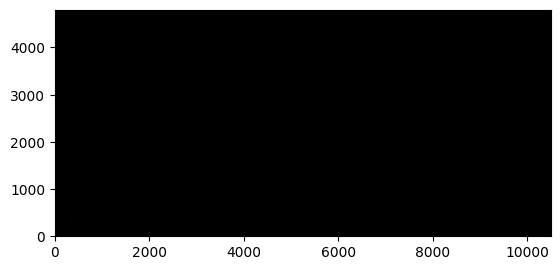

In [27]:
science_image = fits.getdata(fits_locs[2], memmap=False, ext=2, header=False)

In [4]:
detection_image, dof = chisq_utils.get_detection_image(fits_locs)

  0%|          | 0/6 [00:00<?, ?it/s]INFO:root:loading /home/walml/repos/gz-jwst/data/dev_data/hlsp_ceers_jwst_nircam_nircam6_f115w_v0.5_i2d.fits.gz
INFO:root:scale is 0.0059505991358930685
 17%|█▋        | 1/6 [00:22<01:53, 22.75s/it]INFO:root:loading /home/walml/repos/gz-jwst/data/dev_data/hlsp_ceers_jwst_nircam_nircam6_f150w_v0.5_i2d.fits.gz
INFO:root:scale is 0.007001362761454099
 33%|███▎      | 2/6 [00:45<01:31, 22.98s/it]INFO:root:loading /home/walml/repos/gz-jwst/data/dev_data/hlsp_ceers_jwst_nircam_nircam6_f200w_v0.5_i2d.fits.gz
INFO:root:scale is 0.0058536437155385385
 50%|█████     | 3/6 [01:08<01:09, 23.03s/it]INFO:root:loading /home/walml/repos/gz-jwst/data/dev_data/hlsp_ceers_jwst_nircam_nircam6_f277w_v0.5_i2d.fits.gz
INFO:root:scale is 0.0031963587807419423
 67%|██████▋   | 4/6 [01:32<00:46, 23.16s/it]INFO:root:loading /home/walml/repos/gz-jwst/data/dev_data/hlsp_ceers_jwst_nircam_nircam6_f356w_v0.5_i2d.fits.gz
INFO:root:scale is 0.002956795161373744
 83%|████████▎ | 5/6

In [5]:
np.save('temp_detection_image.npy', detection_image)

In [6]:
np.isnan(detection_image).mean()

0.0

In [7]:
np.min(detection_image), np.max(detection_image)

(0.0, 1.0)

In [8]:
# plt.imshow(detection_image, origin='lower', cmap='viridis')
# plt.imshow(detection_image, cmap='gray')

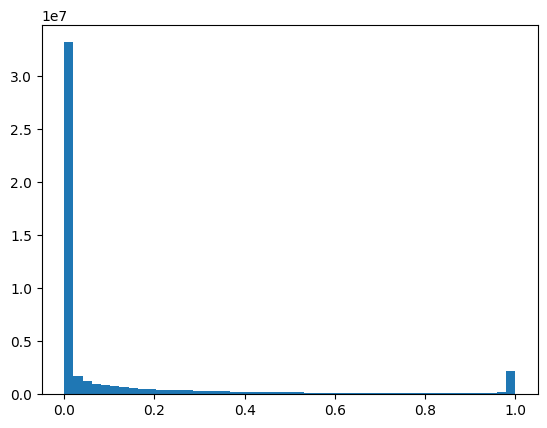

In [9]:
_ = plt.hist(detection_image.flatten(), bins=np.linspace(0, 1))

Text(0.5, 1.0, 'Multi-band Detection Image')

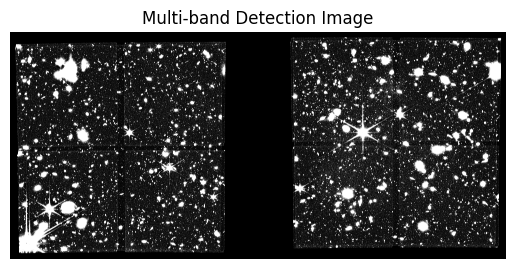

In [48]:
to_show = np.clip(detection_image, a_min=0, a_max=np.percentile(detection_image[~np.isnan(detection_image)], 93.))


fig, ax = plt.subplots()
ax.imshow(to_show, origin='lower', cmap='gray')
ax.axis('off')
ax.set_title('Multi-band Detection Image')

Text(0.5, 1.0, 'Original F200W Image')

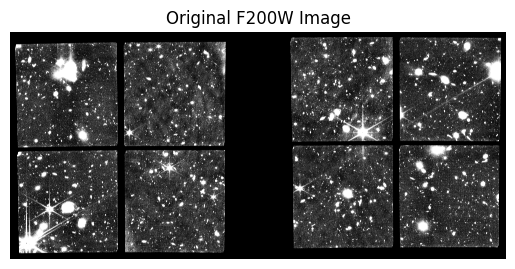

In [49]:
to_show = np.clip(science_image, a_min=0, a_max=np.percentile(science_image[~np.isnan(science_image)], 93.))

fig, ax = plt.subplots()
ax.imshow(to_show, origin='lower', cmap='gray')
ax.axis('off')
ax.set_title('Original F200W Image')

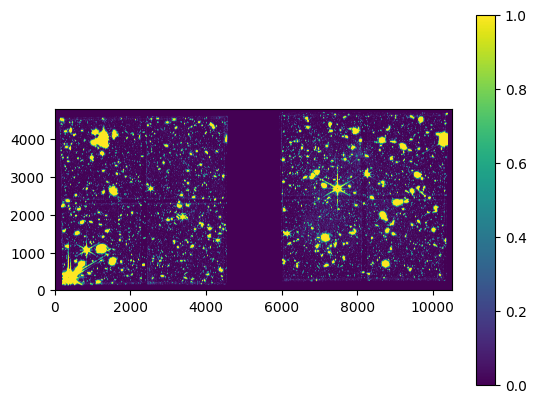

In [39]:
plt.imshow((detection_image > 0.5).astype(bool), origin='lower')
plt.colorbar()


(-0.5, 10499.5, -0.5, 4799.5)

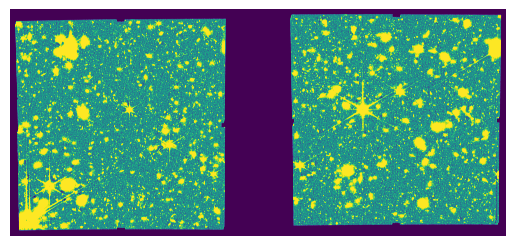

In [46]:
fig, ax = plt.subplots()
ax.imshow((detection_image > 0).astype(int), origin='lower')
ax.axis('off')

In [44]:
# np.isnan(detection_image).any()

False

In [42]:
pd.value_counts((detection_image == 0).flatten())

/tmp/ipykernel_9858/3747484401.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts((detection_image == 0).flatten())


True     27169540
False    23230460
Name: count, dtype: int64

In [ ]:
np.mean(detection_image == 0), np.mean(detection_image > 0.5), np.mean(detection_image > 0.9)

(0.5390781746031746, 0.10175537698412698, 0.05470996031746032)

In [ ]:
# TODO apply photutils detection to segment sources